# Mid-Project | Ironhack 

## Case Study: Housing - Regression

#### Get data 

In [1]:
import numpy as np
import pandas as pd
import datetime
# option so we can always see all columns
pd.set_option('display.max_columns', None)


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("regression_data.xls")
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


#### Data description


| Column name | Description |
| --- | --- | 
| id | unique identification number for the property |
| date | the date the house was sold |
| bedrooms | the number of bedrooms |
| bathrooms | the number of bathrooms |
| sqft_living | living room area before renovations |
| sqft_lot | lotSize area before renovations |
| floors | the number of floors |
| waterfront | the house which has a view to a waterfront |
| view | the number or quality of the views of the house (from 0 (none) to 4 (4 sides or really good view)|
| condition | how good the condition is: 1 indicates worn-out property and 5 excellent |
| grade |  overall grade given to the housing unit, based on the King County grading system: 1 poor, 13 excellent |
| sqft_above | square footage of house apart from the basement |
| sqft_basement | area of the basement |
| yr_built | the year when the house was built |
| yr_renovated | the year when the house was renovated |
| zipcode | the zipcode of the location |
| lat | the latitude of the location |
| long | the longitude of the location |
| sqft_living15 | living room area in 2015, after renovations, this might or might not have affected the lotSize area |
| sqft_lot15 | lotSize area in 2015, after renovations |
| price | the price of the house |

#### EDA: Explore the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [4]:
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [5]:
df.shape

(21597, 21)

##### Descriptive Statistics

In [6]:
df.describe(include=[np.number])

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


In [7]:
df.isna().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

#### Check for nulls 

In [8]:
df.isnull().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

#### Check for duplicates

In [9]:
df.duplicated().sum()

0

In [10]:
# Searching for duplicate "ids"
df["id"].value_counts()

795000620     3
1568100300    2
2892700041    2
1450100390    2
3395040550    2
             ..
2595650170    1
7212651100    1
9808700025    1
6772200055    1
2424410110    1
Name: id, Length: 21420, dtype: int64

In [11]:
# Searching for the number of duplicate ids
(df["id"].value_counts() >1).sum()

176

In [12]:
# We want to take a look at some duplicate ids
df[df['id'] == 795000620]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
17588,795000620,2014-09-24,3,1.0,1080,6250,1.0,0,0,2,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,115000
17589,795000620,2014-12-15,3,1.0,1080,6250,1.0,0,0,2,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,124000
17590,795000620,2015-03-11,3,1.0,1080,6250,1.0,0,0,2,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,157000


In [13]:
df[df['id'] == 1568100300]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
9105,1568100300,2014-09-17,6,4.5,3500,8504,2.0,0,0,3,7,3500,0,1980,0,98155,47.7351,-122.295,1550,8460,350000
9106,1568100300,2015-01-21,6,4.5,3500,8504,2.0,0,0,3,7,3500,0,1980,0,98155,47.7351,-122.295,1550,8460,682500


#### We have seen that the duplicate ids belong to the same property but with different sale dates. This is not relevant for our case study, so we proceed to drop duplicate rows, leaving only the row with the last sale.

In [14]:
df = df.drop_duplicates(subset = ['id'], keep = 'last')

In [15]:
# Confirming if the drop was correct
df[df['id'] == 795000620]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
17590,795000620,2015-03-11,3,1.0,1080,6250,1.0,0,0,2,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,157000


In [16]:
df["id"].value_counts()

1777500160    1
1322059002    1
8091411100    1
6071600370    1
1231001130    1
             ..
2174503500    1
1541700170    1
1898900040    1
9542801990    1
2424410110    1
Name: id, Length: 21420, dtype: int64

#### Analyse the categorical columns

Let's make a function to see together some characteristics of all the categorical columns: `bedrooms`, `bathrooms`, `floors`, `waterfront`, `view`, `condition`, `grade`. 

In [17]:
df[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode']] = df[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode']].astype(object)

In [18]:
#let's check that it's done
df.dtypes

id                        int64
date             datetime64[ns]
bedrooms                 object
bathrooms                object
sqft_living               int64
sqft_lot                  int64
floors                   object
waterfront               object
view                     object
condition                object
grade                    object
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                  object
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

In [19]:
categorical=[column for column in df.columns if (df[column].dtype==object)]     

In [20]:
#let's make a function to see some characteristics of each categorical column: column name, unique values, number of unique values (percentage)
for i in categorical:
    print ('Column: {}'.format(df[i].name)) 
    print('Unique values: {}'.format(len(df[i].unique()))) 
    print(df[i].unique())
    print(df[i].value_counts()/ sum(df[i].value_counts())*100)   
    print('\n----------')    

Column: bedrooms
Unique values: 12
[3 2 4 5 1 6 7 8 9 11 10 33]
3     45.429505
4     31.974790
2     12.773109
5      7.404295
6      1.237162
1      0.891690
7      0.177404
8      0.060691
9      0.028011
10     0.014006
11     0.004669
33     0.004669
Name: bedrooms, dtype: float64

----------
Column: bathrooms
Unique values: 29
[1.0 2.25 3.0 2.0 4.5 1.5 2.5 1.75 2.75 3.25 4.0 3.5 0.75 4.75 5.0 4.25
 3.75 1.25 5.25 6.0 0.5 5.5 6.75 5.75 8.0 7.5 7.75 6.25 6.5]
2.50    24.985994
1.00    17.712418
1.75    14.098973
2.25     9.481793
2.00     8.930906
1.50     6.671335
2.75     5.518207
3.00     3.487395
3.50     3.403361
3.25     2.735761
3.75     0.723623
4.00     0.625584
4.50     0.462185
4.25     0.368814
0.75     0.326797
4.75     0.107376
5.00     0.098039
5.25     0.060691
5.50     0.046685
1.25     0.042017
6.00     0.028011
5.75     0.018674
0.50     0.018674
6.50     0.009337
6.25     0.009337
6.75     0.009337
8.00     0.009337
7.50     0.004669
7.75     0.004669
Name: bath

In [21]:
print(f" Percentage of renovated houses = {round((df['yr_renovated'] !=0).sum() / sum(df['yr_renovated'].value_counts())*100, 2)}%")

 Percentage of renovated houses = 4.25%


In [22]:
(df['yr_renovated'] !=0).sum()

910

In [23]:
df['yr_renovated'].unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944])

#### Dropping irrelevant columns

In [24]:
# the id column doesn't provide relevant info for our prediction so we drop it, and the sqft_living and sqft_lot as well because they are old values, we have the new sqft_living15 and sqft_lot15 
df=df.drop(columns=['id', 'sqft_living', 'sqft_lot'], axis=1)

In [25]:
df.head()

,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,2014-10-13,3,1.0,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,2014-12-09,3,2.25,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2015-02-25,2,1.0,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2014-12-09,4,3.0,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,2015-02-18,3,2.0,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [29]:
df1 = pd.DataFrame(2016 - df["yr_built"])

In [31]:
df1 = df1.rename(columns={'yr_built': 'house_year'})

In [32]:
df = pd.concat([df, df1], axis=1)

In [33]:
df

,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,house_year
0,2014-10-13,3,1.0,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900,61
1,2014-12-09,3,2.25,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000,65
2,2015-02-25,2,1.0,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000,83
3,2014-12-09,4,3.0,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000,51
4,2015-02-18,3,2.0,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,3,2.5,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000,7
21593,2015-02-23,4,2.5,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000,2
21594,2014-06-23,2,0.75,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101,7
21595,2015-01-16,3,2.5,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000,12


#### Analyse the date column

The date column is already in datetime format, so we don't need to change it.

In [46]:
df['date'].min()

Timestamp('2014-05-02 00:00:00')

In [47]:
df['date'].max()

Timestamp('2015-05-27 00:00:00')

#### Analyse the numerical columns

In [48]:
numerical = df._get_numeric_data()
numerical

,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,price,house_year
0,1180,0,1955,0,47.5112,-122.257,1340,5650,221900,61
1,2170,400,1951,1991,47.7210,-122.319,1690,7639,538000,65
2,770,0,1933,0,47.7379,-122.233,2720,8062,180000,83
3,1050,910,1965,0,47.5208,-122.393,1360,5000,604000,51
4,1680,0,1987,0,47.6168,-122.045,1800,7503,510000,29
...,...,...,...,...,...,...,...,...,...,...
21592,1530,0,2009,0,47.6993,-122.346,1530,1509,360000,7
21593,2310,0,2014,0,47.5107,-122.362,1830,7200,400000,2
21594,1020,0,2009,0,47.5944,-122.299,1020,2007,402101,7
21595,1600,0,2004,0,47.5345,-122.069,1410,1287,400000,12


In [49]:
numerical.describe()

,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,price,house_year
count,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000
mean,1791.170215,291.962418,1971.092997,84.793091,47.560197,-122.213784,1988.384080,12775.718161,5.418614e+05,44.907003
std,828.692965,442.875502,29.387141,402.574626,0.138589,0.140791,685.537057,27345.621867,3.675569e+05,29.387141
min,370.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04,1.000000
25%,1200.000000,0.000000,1952.000000,0.000000,47.471200,-122.328000,1490.000000,5100.000000,3.249500e+05,19.000000
50%,1560.000000,0.000000,1975.000000,0.000000,47.572100,-122.230000,1840.000000,7620.000000,4.505500e+05,41.000000
75%,2220.000000,560.000000,1997.000000,0.000000,47.678100,-122.125000,2370.000000,10086.250000,6.450000e+05,64.000000
max,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06,116.000000


#### Check the numerical variable normality visually

ValueError: num must be 1 <= num <= 9, not 10

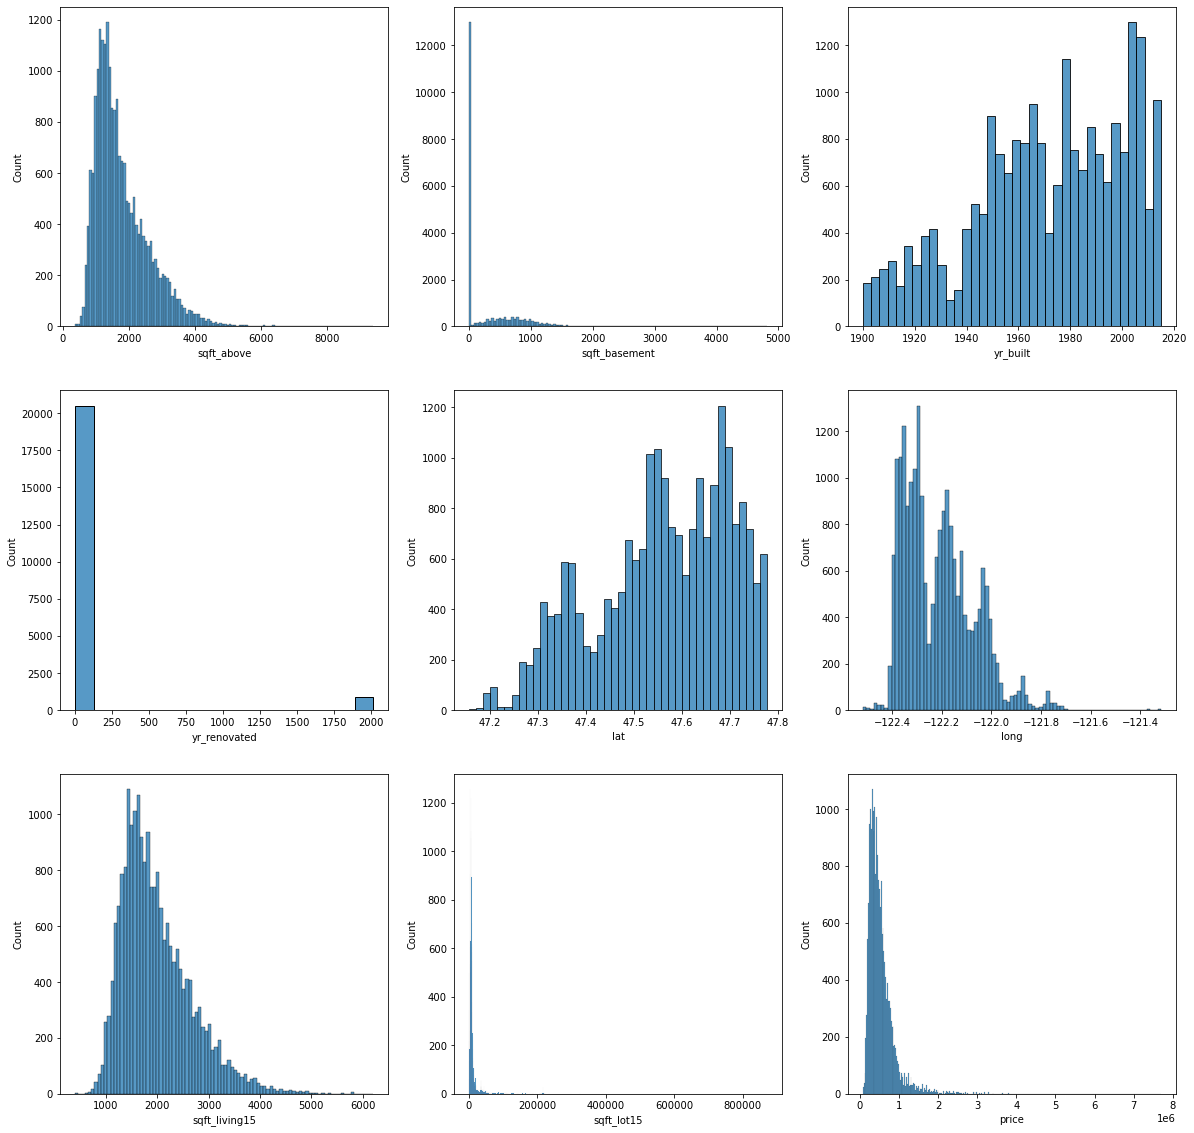

In [64]:
plt.figure(figsize=(20,20))
for i, column in enumerate(numerical.columns, 1):
    plt.subplot(3,3,i)
    sns.histplot(numerical[column])

In [ ]:
sns.pairplot(numerical)

#### Check the categorical variables visually

In [ ]:
for i in categorical:
    plt.figure(figsize=(8,6))
    plt.bar(df[i].unique(), df[i].value_counts())
    plt.title(i)
    plt.show();

#### Check for multicolinearity

In [ ]:
corr_matrix = df.corr()

In [ ]:
# check for multicollinearity 
corr_matrix=df.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
plt.figure(figsize = (10,10))
sns.jointplot(x=df.lat.values, y = df.long.values, height = 10)
plt.ylabel('Longitude', fontsize = 12)
plt.xlabel('Latitude', fontsize = 12)
plt.show()
sns.despine

#### Pre-processing the data

In [ ]:
n = df.boxplot(figsize= (10,8))

<AxesSubplot:xlabel='sqft_above'>

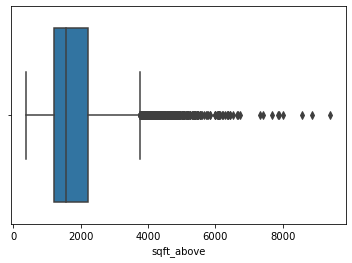

In [51]:
sns.boxplot(x=df['sqft_above'])

<AxesSubplot:xlabel='sqft_basement'>

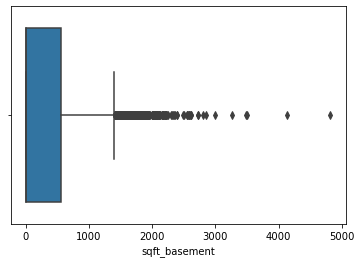

In [52]:
sns.boxplot(x=df['sqft_basement'])

<AxesSubplot:xlabel='yr_built'>

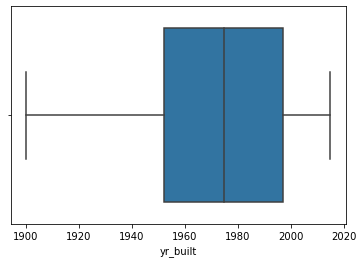

In [53]:
sns.boxplot(x=df['yr_built'])

<AxesSubplot:xlabel='yr_renovated'>

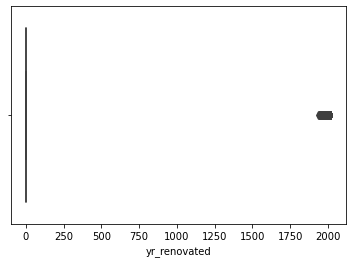

In [54]:
sns.boxplot(x=df['yr_renovated'])

<AxesSubplot:xlabel='lat'>

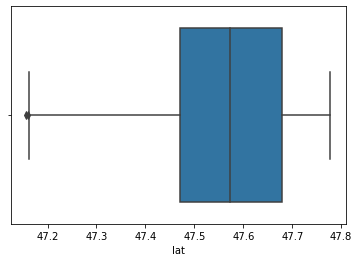

In [55]:
sns.boxplot(x=df['lat'])

<AxesSubplot:xlabel='long'>

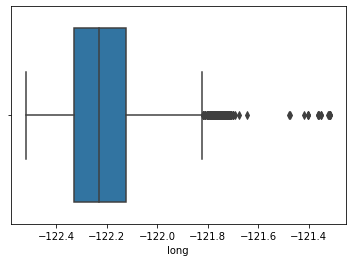

In [56]:
sns.boxplot(x=df['long'])

<AxesSubplot:xlabel='sqft_living15'>

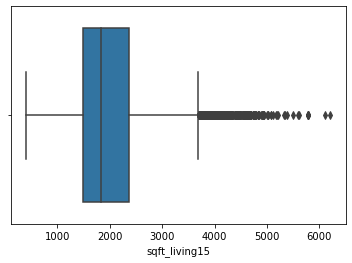

In [57]:
sns.boxplot(x=df['sqft_living15'])

<AxesSubplot:xlabel='sqft_lot15'>

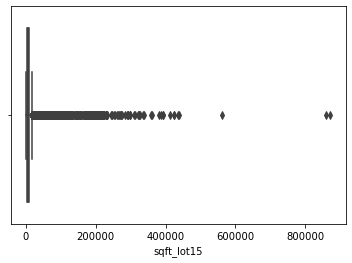

In [58]:
sns.boxplot(x=df['sqft_lot15'])

In [59]:
iqr = np.percentile(df['sqft_above'],75) - np.percentile(df['sqft_above'],25)
upper_limit = np.percentile(df['sqft_above'],75) + 1.5*iqr
lower_limit = np.percentile(df['sqft_above'],25) - 1.5*iqr
df = df[(df['sqft_above']>lower_limit) & (df['sqft_above']<upper_limit)]

In [60]:
iqr = np.percentile(df['sqft_basement'],75) - np.percentile(df['sqft_basement'],25)
upper_limit = np.percentile(df['sqft_basement'],75) + 1.5*iqr
lower_limit = np.percentile(df['sqft_basement'],25) - 1.5*iqr
df = df[(df['sqft_basement']>lower_limit) & (df['sqft_basement']<upper_limit)]

In [61]:
iqr = np.percentile(df['long'],75) - np.percentile(df['long'],25)
upper_limit = np.percentile(df['long'],75) + 1.5*iqr
lower_limit = np.percentile(df['long'],25) - 1.5*iqr
df = df[(df['long']>lower_limit) & (df['long']<upper_limit)]

In [62]:
iqr = np.percentile(df['sqft_living15'],75) - np.percentile(df['sqft_living15'],25)
upper_limit = np.percentile(df['sqft_living15'],75) + 1.5*iqr
lower_limit = np.percentile(df['sqft_living15'],25) - 1.5*iqr
df = df[(df['sqft_living15']>lower_limit) & (df['sqft_living15']<upper_limit)]

<Figure size 720x720 with 0 Axes>

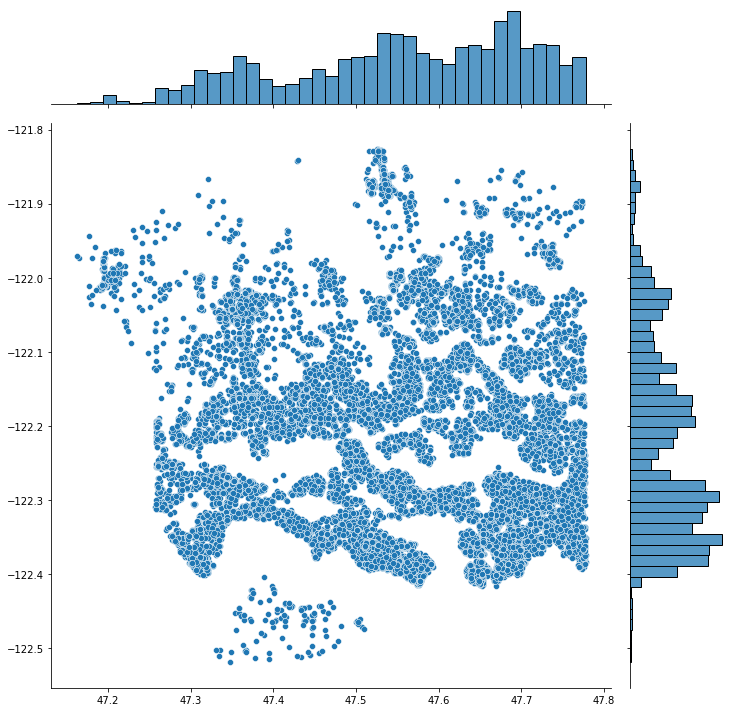

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [63]:
plt.figure(figsize = (10,10))
sns.jointplot(x=df.lat.values, y = df.long.values, height = 10)
plt.ylabel('Longitude', fontsize = 12)
plt.xlabel('Latitude', fontsize = 12)
plt.show()
sns.despine

#### Modelling